        ┌───┐           ░       ┌─┐
q_0: |0>┤ H ├──■────■───░───────┤M├
        └───┘┌─┴─┐  │   ░    ┌─┐└╥┘
q_1: |0>─────┤ X ├──┼───░────┤M├─╫─
             └───┘┌─┴─┐ ░ ┌─┐└╥┘ ║ 
q_2: |0>──────────┤ X ├─░─┤M├─╫──╫─
                  └───┘ ░ └╥┘ ║  ║ 
 c_0: 0 ═══════════════════╬══╬══╩═
                           ║  ║    
 c_1: 0 ═══════════════════╬══╩════
                           ║       
 c_2: 0 ═══════════════════╩═══════
                                   
{'000': 483, '111': 541}


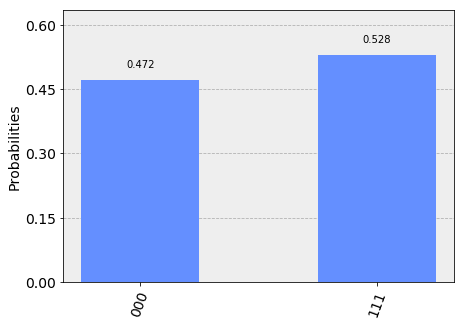

In [3]:
import numpy as np
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import execute


#Build the Quantum Model
q = QuantumRegister(3, 'q')
circ = QuantumCircuit(q)
circ.h(q[0])
circ.cx(q[0], q[1])
circ.cx(q[0], q[2])
#Build the Classical Register and the Measure
c = ClassicalRegister(3, 'c')
meas = QuantumCircuit(q, c)
meas.barrier(q)

meas.measure(q,c)
qc = circ+meas 
print(qc)

#Run the simulation
from qiskit import BasicAer
backend_sim = BasicAer.get_backend('qasm_simulator')
job_sim = execute(qc, backend_sim, shots=1024)
result_sim = job_sim.result()
counts = result_sim.get_counts(qc)
print(counts)


#visualization toolbox
from qiskit.tools.visualization import plot_histogram
plot_histogram(counts)
